# Trabajo práctico nro. 6

En este práctico vamos a implementar un clasificador de imágenes usando CNN. El objetivo será diseñar y entrenar un algoritmo que en forma automática clasifique una imagen como correspondiente a una clase entre varias. Las clases las vamos a elegir nosotros (perros y gatos, autos y motos, o algo más interesante o útil).

Para probar el modelo, se debe:
* Buscar 2 imágenes nuevas,
* mostrarlas en pantalla (matplotlib),
* clasificarlas con el modelo y mostrar el resultado de la clasificación (puntaje para cada clase).

**NOTA**: Usar plantilla disponible en colab.

# Desarrollo

Se realizará un clasificador de componentes electrónicos desde un dataset local, el mismo está compuesto por: 

* Capacitores
* Diodos
* Circuitos Integrados 
* Inductores
* Resistores 
* Transformadores

# 1. Se importa tensorflow y se setea el uso de GPU

Como se aborda el trabajo de manera local y no mediante Colab, es necesario verificar el uso de la gpu para el desarrollo del modelo.

In [13]:
import tensorflow as tf
import os

In [14]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [15]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Se extraen las imagenes poco confiables

Se realiza porque se ha utilizado un set de imágenes propio, este paso no se realiza en el ejemplo provisto, dado que en ese ejemplo se utiliza CIFAR10, un set con imágenes útiles.

In [16]:
import cv2
import imghdr

In [17]:
data_dir = 'data' 

In [18]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [19]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Carga y muestra de datos

In [20]:
import numpy as np
from matplotlib import pyplot as plt

In [21]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 2535 files belonging to 5 classes.


In [22]:
data_iterator = data.as_numpy_iterator()

In [23]:
batch = data_iterator.next()

In [24]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
ax = axs.flatten()

components = ["Capacitor",
              "Diode",
              "Inductor",
              "Resistor",
              "Transformer",
]

for idx, img in enumerate(batch[0][:16]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(components[batch[1][idx]])

# 4. Escalamiento de datos

In [25]:
data = data.map(lambda x,y: (x/255, y))

In [26]:
data.as_numpy_iterator().next()

(array([[[[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

# 5. Selección de tamaño de entrenamiento y de evaluación

In [27]:
train_size = int(len(data)*.70)
val_size = int(len(data)*.30)
#test_size = int(len(data)*.1)
# Esta última linea se puede implementar para colocar la tercera etapa de testeo, utilizando una fracción del total de los datos

In [28]:
train_size

56

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
#test = data.skip(train_size+val_size).take(test_size)

# 6. Construcción del modelo CNN

In [30]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import models, layers

In [32]:
model = Sequential()

In [33]:
model = models.Sequential()
# 1st convolution layer: 32 filters of 3x3, ReLU activation function
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
# 1st max pooling layer: 2x2
model.add(layers.MaxPooling2D((2, 2)))
# 2nd convolution layer: 64 filters of 3x3, ReLU activation function
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# 2nd max pooling layer: 2x2
model.add(layers.MaxPooling2D((2, 2)))
# 3st convolution layer: 64 filters of 3x3, ReLU activation function
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Flatten layer
model.add(layers.Flatten())
# Dense layer
model.add(layers.Dense(64, activation='relu'))
# Output layer
model.add(layers.Dense(10, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 230400)           

# 7. Entrenamiento

In [35]:
logdir='logs'

In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [38]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5


56/56 [==============================] - 21s 214ms/step - loss: 2.0413 - accuracy: 0.3281 - val_loss: 1.3593 - val_accuracy: 0.3903
Epoch 2/5
56/56 [==============================] - 12s 162ms/step - loss: 1.2154 - accuracy: 0.5262 - val_loss: 1.1809 - val_accuracy: 0.5599
Epoch 3/5
56/56 [==============================] - 11s 141ms/step - loss: 1.0072 - accuracy: 0.6217 - val_loss: 1.2813 - val_accuracy: 0.4939
Epoch 4/5
56/56 [==============================] - 9s 133ms/step - loss: 0.8887 - accuracy: 0.6602 - val_loss: 1.1471 - val_accuracy: 0.5532
Epoch 5/5
56/56 [==============================] - 9s 132ms/step - loss: 0.5903 - accuracy: 0.7857 - val_loss: 1.1112 - val_accuracy: 0.6501


# 8. Presentación de la performance

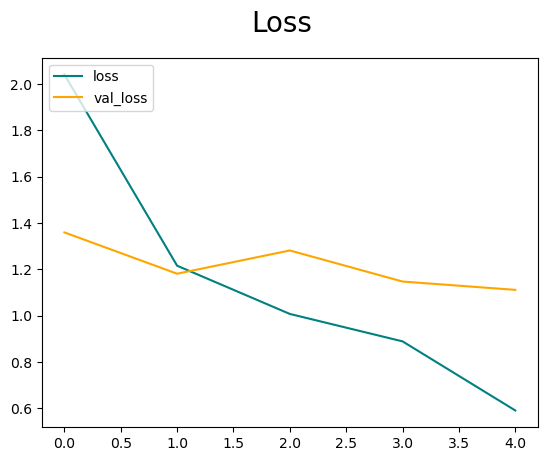

In [39]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

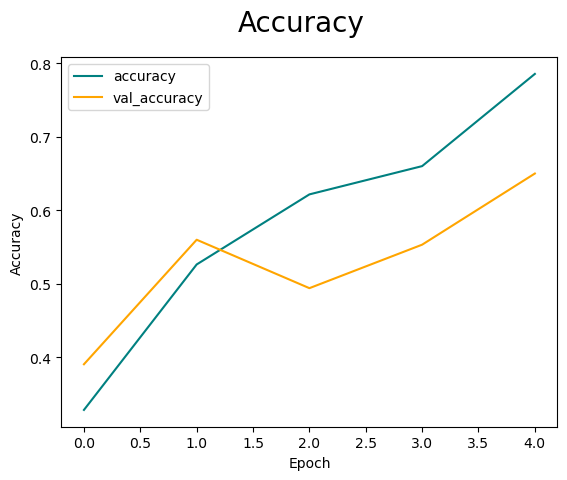

In [40]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluación

In [41]:
# batch[0]: imágenes
# batch[1]: labels
test_loss, test_acc = model.evaluate(batch[0],  batch[1], verbose=2)

1/1 - 1s - loss: 63.2853 - accuracy: 0.8125 - 760ms/epoch - 760ms/step


# 10. Test

In [42]:
import cv2

In [43]:
img = cv2.imread('diode.jpg')

In [44]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [45]:
DIODE = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 3s 3s/step


In [46]:
print(DIODE)


[[3.7393481e-01 3.7503603e-01 1.7682017e-03 6.9530278e-02 1.7972375e-01
  1.2950963e-07 1.2856030e-06 5.2202608e-06 2.1541494e-07 1.6848074e-07]]


# 11. Guardado del modelo

In [47]:
from keras.models import load_model

In [48]:
model.save(os.path.join('models','imageclassifier.h5'))

In [49]:
new_model = load_model('models\imageclassifier.h5')

# 12 Puntaje para cada clase

Cada elemento del array representa: 

* array[0]: Capacitor
* array[1]: Diodo
* array[2]: Inductor
* array[3]: Resistor
* array[4]: Transformador
* array[5]: -
* array[6]: -
* array[7]: -
* array[8]: -
* array[9]: -

In [50]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 2s 2s/step


array([[3.7393481e-01, 3.7503603e-01, 1.7682017e-03, 6.9530278e-02,
        1.7972375e-01, 1.2950963e-07, 1.2856030e-06, 5.2202608e-06,
        2.1541494e-07, 1.6848074e-07]], dtype=float32)